## <center>Examen mi-parcours </center>
<center>Master parcours SSD - UE Apprentissage statistique 2 </center>
<center>Automne 2021 </center>

In [119]:
# load package
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt

### Statistique descriptive

In [120]:
# load data
train_data_clinical = pd.read_csv("dataset/train-data_clinical.csv",sep=";")
train_data_clinical.shape
train_data_clinical.head()

,EXERCISE_FREQUENCY,SEX,ONE_LITER_OF_WATER_A_DAY_FREQUENCY,SEAFOOD_FREQUENCY,PROBIOTIC_FREQUENCY,OLIVE_OIL,FRUIT_FREQUENCY,SLEEP_DURATION,SUGAR_SWEETENED_DRINK_FREQUENCY,MILK_CHEESE_FREQUENCY,RED_MEAT_FREQUENCY,MEAT_EGGS_FREQUENCY,VEGETABLE_FREQUENCY
0,2,0,4,2,4,0,3,4,0,0,3,4,3
1,0,1,3,1,0,3,2,3,1,1,1,2,2
2,2,1,3,2,4,2,4,5,0,1,1,4,4
3,3,0,4,1,0,2,0,2,0,4,2,4,3
4,3,1,2,1,1,4,3,4,0,3,3,4,3


In [121]:
test_data_clinical = pd.read_csv("dataset/test-data_clinical.csv",sep=";",decimal=".")
test_data_clinical.shape

(850, 13)

In [122]:
train_data_otu = pd.read_csv("dataset/train-data_otu.csv",sep=";",low_memory=False,decimal=".") 
train_data_otu.shape
train_data_otu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4965 entries, 0 to 4964
Columns: 7033 entries, OTU_1 to OTU_7033
dtypes: object(7033)
memory usage: 266.4+ MB


In [123]:
train_data_otu.head()

,OTU_1,OTU_2,OTU_3,OTU_4,OTU_5,OTU_6,OTU_7,OTU_8,OTU_9,OTU_10,...,OTU_7024,OTU_7025,OTU_7026,OTU_7027,OTU_7028,OTU_7029,OTU_7030,OTU_7031,OTU_7032,OTU_7033
0,"0,180439273676199","0,238664781994129",0,"0,00385995433293465",0,0,0,"0,000869848863759922","0,0167445906273785",0,...,0,0,0,0,0,0,0,0,0,0
1,"0,000883197173769044","0,000504684099296597","0,000378513074472447","0,00170330883512601","0,000378513074472447",0,"0,0159921773964609","0,0166230325205817",0,0,...,0,0,0,0,0,0,0,0,0,0
2,"0,715733658673924","0,00225235793721552","0,0245413166909108","0,00183004082398761",0,"0,0156726573131247","0,00168926845291164","0,000797710102763831","0,00183004082398761",0,...,0,0,0,0,0,0,0,0,0,0
3,"0,00238338440585632","0,00374531835205993","0,00340483486550902","0,154125524912042","0,00612870275791624",0,"0,145386448757235",0,0,"0,0396095789354216",...,0,0,0,0,0,0,0,0,0,0
4,"0,000683565935630874",0,"0,105553973227001","0,0656223298205639","0,210823127314156","0,0504699515807462","0,0238678439191114","0,0694958701224722","0,00262033608658502",0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
test_data_otu =pd.read_csv("dataset/test-data_otu.csv",sep=";",low_memory=False)
test_data_otu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Columns: 7033 entries, OTU_1 to OTU_7033
dtypes: int64(37), object(6996)
memory usage: 45.6+ MB


In [125]:
test_data_otu.head()

,OTU_1,OTU_2,OTU_3,OTU_4,OTU_5,OTU_6,OTU_7,OTU_8,OTU_9,OTU_10,...,OTU_7024,OTU_7025,OTU_7026,OTU_7027,OTU_7028,OTU_7029,OTU_7030,OTU_7031,OTU_7032,OTU_7033
0,"0,266402938683244",0,"0,00469059056230574","0,00514269567674484","0,132862390505793","0,000678157671658661","0,00299519638315908","0,0305170952246397","0,0394461712348121",0,...,0,0,0,0,0,0,0,0,0,0
1,"0,00141211445559272","0,228985507246377","0,00921590486807878","0,0130063173541434",0,0,"0,00594574507617986","0,0120401337792642","0,145893719806763",0,...,0,0,0,0,0,0,0,0,0,0
2,"0,0010618312505105","0,0414930980968717","0,0115984644286531","0,0495793514661439",0,0,"0,008739687984971","0,00996487788940619","0,00914808461978273","0,00269541778975741",...,0,0,0,0,0,0,0,0,0,0
3,"0,00216740948775872","0,210055558947433","0,234934977715367","0,0906954026497344","0,000366322730325417","0,000305268941937847","0,000366322730325417",0,"0,0721045240857195",0,...,0,0,0,0,0,0,0,0,0,0
4,"0,549270472768698","0,0304079218332384","0,000438154493274329","0,00635324015247776",0,0,"0,00030670814529203",0,0,0,...,0,"8,76308986548657e-05",0,0,0,0,0,0,0,0


### Pre-Traitement

In [126]:
def pre_processing(data):
    column_data = np.ravel(np.array(data.columns))
    for i in column_data:
        if data[i].dtypes=="object":
            data[i] = [x.replace(',','.') for x in data[i]]
    data = data.apply(pd.to_numeric)
    return data

In [127]:
train_data_otu = pre_processing(train_data_otu)

In [128]:
train_data_otu.head()
train_data_otu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4965 entries, 0 to 4964
Columns: 7033 entries, OTU_1 to OTU_7033
dtypes: float64(7033)
memory usage: 266.4 MB


In [129]:
test_data_otu = pre_processing(test_data_otu)

In [130]:
test_data_otu.head()
test_data_otu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Columns: 7033 entries, OTU_1 to OTU_7033
dtypes: float64(6996), int64(37)
memory usage: 45.6 MB


On transforme toutes les variables de type object en float

In [131]:
train_label = pd.read_csv("dataset/train-label.txt",header=None)
train_label = np.array(train_label)
train_label
np.unique(train_label)
np.size(train_label)

4965

On transforme les valeurs du vecteur train label en 0 et 1

Healthy = 0

IBD = 1

In [132]:
def encoder_train_label(data):
    n = np.size(data)
    for i in range(n):
        if(data[i]=='Healthy'):
            data[i] = 0
        if(data[i]=='IBD'):
            data[i] = 1
    return data

In [133]:
train_label = np.ravel(encoder_train_label(train_label).astype(int))

<BarContainer object of 2 artists>

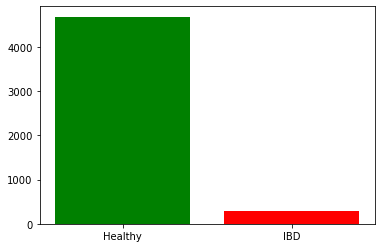

In [134]:
# Representation des effectifs par class
h = np.bincount(train_label)
plt.bar(['0','1'],h,color=['green','red'],tick_label=['Healthy','IBD'])

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

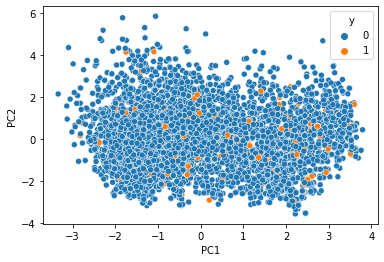

In [135]:
from sklearn.decomposition import PCA
import seaborn as sn
pca = PCA(n_components=2)
pca.fit(train_data_clinical)
coord = pca.fit_transform(train_data_clinical)
pca_frame = pd.DataFrame(coord,columns=['PC1','PC2'])
pca_frame=pd.concat([pca_frame,pd.DataFrame(train_label,columns=['y'])],axis=1)
sn.scatterplot(x='PC1',y='PC2',hue='y',data=pca_frame)

In [18]:
sum(pca.explained_variance_ratio_)

0.32340346747427906

In [ ]:
from sklearn.preprocessing import StandardScaler
def data_scaler(data):
    scaler = StandardScaler()
    scaler.fit(data)
    data = scaler.transform(data)
    return data
train_data_clinical = data_scaler(train_data_clinical)
test_data_clinical = data_scaler(test_data_clinical)
train_data_otu = data_scaler(train_data_otu)
test_data_otu = data_scaler(test_data_otu)

Une fonction train_test pour definir le jeu de données d'entrainement et test

In [19]:
def train_test(train_data,test_data,train_label):
    size_train_data = train_data.shape[0]
    size_test_data = test_data.shape[0]
    ind_train_data = np.random.randint(size_train_data,size=size_train_data)
    ind_test_data = np.random.randint(size_test_data,size=size_test_data)
    X_train = train_data[ind_train_data,:]
    y_train = train_label[ind_train_data]
    X_test = test_data[ind_test_data,:]
    y_test = train_label[ind_test_data]
    return (X_train,X_test,y_train,y_test)

In [20]:
from sklearn.preprocessing import StandardScaler
def data_scaler(data):
    scaler = StandardScaler()
    scaler.fit(data)
    data = scaler.transform(data)
    return data
train_data_clinical = data_scaler(train_data_clinical)
test_data_clinical = data_scaler(test_data_clinical)
train_data_otu = data_scaler(train_data_otu)
test_data_otu = data_scaler(test_data_otu)

In [111]:
X_train_clinical,X_test_clinical,y_train_clinical,y_test_clinical = train_test(train_data_clinical,test_data_clinical,train_label)
X_train_clinical.shape, X_test_clinical.shape, np.size(y_train_clinical), np.size(y_test_clinical)

((4965, 13), (850, 13), 4965, 850)

In [112]:
X_train_otu,X_test_otu,y_train_otu,y_test_otu = train_test(train_data_otu,test_data_otu,train_label)
X_train_otu.shape, X_test_otu.shape, np.size(y_train_otu), np.size(y_test_otu)

((4965, 7033), (850, 7033), 4965, 850)

In [113]:
X_train = np.concatenate((X_train_clinical,X_train_otu),axis=1)
X_test = np.concatenate((X_test_clinical,X_test_otu),axis=1)
y_train = y_train_clinical
y_test = y_test_clinical

In [114]:
X_train.shape, X_test.shape, np.size(y_train),np.size(y_test)

((4965, 7046), (850, 7046), 4965, 850)

In [115]:
def model_selection(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    score = model.score(x_test,y_test)
    vect_pred = model.predict_proba(x_test)[:,1]
    score_vect_pred = {'score':score,'vect_pred':vect_pred}
    return score_vect_pred

Methode 1 : Classification

In [116]:
from sklearn.neighbors import KNeighborsClassifier
model_1 = KNeighborsClassifier(n_neighbors=4)
model_1_clinical = model_selection(model_1,X_train_clinical,y_train_clinical,X_test_clinical,y_test_clinical)
model_1_otu = model_selection(model_1,X_train_otu,y_train_otu,X_test_otu,y_test_otu)
model_1_clinical_otu = model_selection(model_1,X_train,y_train,X_test,y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,16)}
grid_search = GridSearchCV(model_1,param_grid,cv=10)
grid_search.fit(X_train,y_train)

In [52]:
grid_search.best_params_

{'n_neighbors': 4}

In [117]:
print("score de prédiction = ",model_1_clinical['score'],"\n")
print("score de prédiction = ",model_1_otu['score'],"\n")
print("score de prédiction = ",model_1_clinical_otu['score'])

score de prédiction =  0.9329411764705883 

score de prédiction =  0.9341176470588235 

score de prédiction =  0.9564705882352941


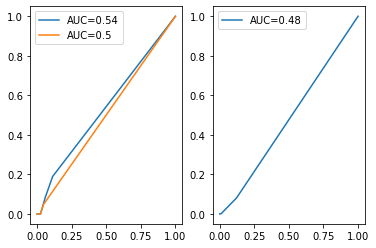

In [118]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr_clinical,tpr_clinical,thres_clinical = roc_curve(y_test_clinical, model_1_clinical['vect_pred'])
fpr_otu,tpr_otu,thres_otu = roc_curve(y_test_otu, model_1_otu['vect_pred'])
auc_clinical = roc_auc_score(y_test_clinical,model_1_clinical['vect_pred'])
auc_otu = roc_auc_score(y_test_otu,model_1_clinical['vect_pred'])
fpr_clinical_otu,tpr_clinical_otu,thres_clinical_otu = roc_curve(y_test, model_1_clinical_otu['vect_pred'])
auc_clinical_otu = roc_auc_score(y_test,model_1_clinical_otu['vect_pred'])
plt.subplot(121)
plt.plot(fpr_clinical,tpr_clinical,label="AUC="+str(np.round(auc_clinical,2)))
plt.plot(fpr_otu,tpr_otu,label="AUC="+str(np.round(auc_otu,2)))
plt.legend()
plt.subplot(122)
plt.plot(fpr_clinical_otu,tpr_clinical_otu,label="AUC="+str(np.round(auc_clinical_otu,2)))
plt.legend()


Methode 2 : Regression logistique 

In [105]:
C_ideal = {'C':[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]}
grid_search = GridSearchCV(LogisticRegression(penalty="l1",solver="liblinear"),C_ideal,cv=10)
grid_search.fit(X_train_clinical,y_train_clinical)

GridSearchCV(cv=10,
             estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7,
                               0.8, 0.9, 1]})

In [107]:
from sklearn.linear_model import LogisticRegression
model_2 = LogisticRegression(penalty="l1",max_iter=1000,random_state=0,solver="liblinear",C=0.05)
model_2_clinical = model_selection(model_2,X_train_clinical,y_train_clinical,X_test_clinical,y_test_clinical)
model_2_otu = model_selection(model_2,X_train_otu,y_train_otu,X_test_otu,y_test_otu)

In [94]:
model=LogisticRegression(max_iter=1000,C=0.05)
model_2_clinical_otu = model_selection(model,X_train,y_train,X_test,y_test)

In [109]:
print("score de prédiction = ",model_2_clinical['score'],"\n")
print("score de prédiction = ",model_2_otu['score'],"\n")
print("score de prédiction = ",model_2_clinical_otu['score'])

score de prédiction =  0.9505882352941176 

score de prédiction =  0.9388235294117647 

score de prédiction =  0.9435294117647058


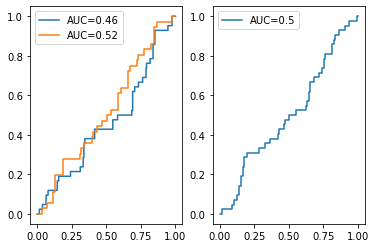

In [110]:
fpr_clinical,tpr_clinical,thres_clinical = roc_curve(y_test_clinical, model_2_clinical['vect_pred'])
auc_clinical = roc_auc_score(y_test_clinical,model_2_clinical['vect_pred'])
fpr_otu,tpr_otu,thres_otu = roc_curve(y_test_otu, model_2_otu['vect_pred'])
auc_otu = roc_auc_score(y_test_otu,model_2_otu['vect_pred'])
fpr_clinical_otu,tpr_clinical_otu,thres_clinical_otu = roc_curve(y_test, model_2_clinical_otu['vect_pred'])
auc_clinical_otu = roc_auc_score(y_test,model_2_clinical_otu['vect_pred'])
plt.subplot(121)
plt.plot(fpr_clinical,tpr_clinical,label="AUC="+str(np.round(auc_clinical,2)))
plt.plot(fpr_otu,tpr_otu,label="AUC="+str(np.round(auc_otu,2)))
plt.legend()
plt.subplot(122)
plt.plot(fpr_clinical_otu,tpr_clinical_otu,label="AUC="+str(np.round(auc_clinical_otu,2)))
plt.legend()

Methode 3 : Random Forest

In [97]:
from sklearn.model_selection import GridSearchCV
n_estim = {'n_estimators':range(100,500,100)}
grid_search = GridSearchCV(RandomForestClassifier(),n_estim,cv=10)
grid_search.fit(X_train_clinical,y_train_clinical)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': range(100, 500, 100)})

In [99]:
from sklearn.ensemble import RandomForestClassifier
model_3 = RandomForestClassifier(n_estimators=400) 
model_3_clinical = model_selection(model_3,X_train_clinical,y_train_clinical,X_test_clinical,y_test_clinical)
model_3_otu = model_selection(model_3,X_train_otu,y_train_otu,X_test_otu,y_test_otu)

In [108]:
model_3_clinical_otu = model_selection(model_3,X_train,y_train,X_test,y_test)

KeyboardInterrupt: 

In [101]:
print("score de prédiction = ",model_3_clinical['score'],"\n")
print("score de prédiction = ",model_3_otu['score'],"\n")
print("score de prédiction = ",model_3_clinical_otu['score'])

score de prédiction =  0.9352941176470588 

score de prédiction =  0.9447058823529412 

score de prédiction =  0.9505882352941176


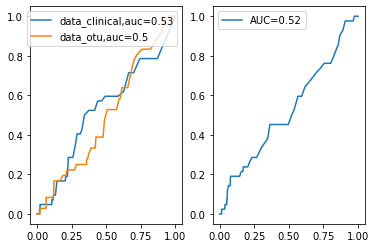

In [102]:
fpr_clinical,tpr_clinical,thres_clinical = roc_curve(y_test_clinical, model_3_clinical['vect_pred'])
auc_clinical = roc_auc_score(y_test_clinical,model_3_clinical['vect_pred'])
fpr_otu,tpr_otu,thres_otu = roc_curve(y_test_otu, model_3_otu['vect_pred'])
auc_otu = roc_auc_score(y_test_otu,model_3_otu['vect_pred'])
plt.subplot(121)
plt.plot(fpr_clinical,tpr_clinical,label="data_clinical,auc="+str(np.round(auc_clinical,2)))
plt.plot(fpr_otu,tpr_otu,label="data_otu,auc="+str(np.round(auc_otu,2)))
plt.legend()
plt.subplot(122)
fpr_clinical_otu,tpr_clinical_otu,thres_clinical_otu = roc_curve(y_test, model_3_clinical_otu['vect_pred'])
auc_clinical_otu = roc_auc_score(y_test,model_3_clinical_otu['vect_pred'])
plt.plot(fpr_clinical_otu,tpr_clinical_otu,label="AUC="+str(np.round(auc_clinical_otu,2)))
plt.legend()

Modele 4 : SVC